In [28]:
import rioxarray
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.xarray

In [2]:
#print working directory
print(os.getcwd())

/home/naheemadebisi/snow-analytics/lowman


In [3]:
#open UAVSAR raster file

MCS_15_20 = rioxarray.open_rasterio('MCS2/MCS_15_20Jan2021_snow_diff.tif')
MCS_15_20


<xarray.DataArray (band: 1, y: 11477, x: 22625)>
[259667125 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -116.4 -116.4 -116.4 ... -115.0 -115.0 -115.0
  * y            (y) float64 44.48 44.48 44.48 44.48 ... 43.59 43.59 43.59 43.59
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [4]:
#Clip the raster 
cropping_geometries = [{
    'type': 'Polygon',
    'coordinates':[
        [[604276,4863907], [601703,4867245], [606245,4870497], [608397,4866855]]
        ]
}]

In [5]:
MCS_15_20_clip = MCS_15_20.rio.clip(geometries=cropping_geometries, crs=31965)

In [20]:
MCS_15_20_clip

<xarray.DataArray (band: 1, y: 763, x: 1358)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * y            (y) float64 43.98 43.98 43.98 43.98 ... 43.92 43.92 43.92 43.92
  * x            (x) float64 -115.7 -115.7 -115.7 ... -115.6 -115.6 -115.6
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

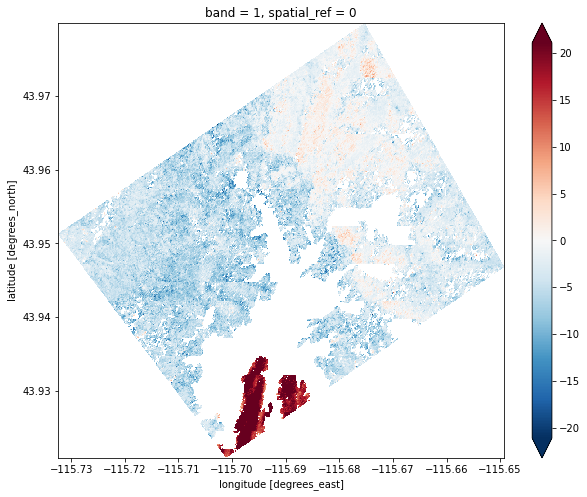

In [26]:
#plot the clipped raster
MCS_15_20_clip.plot(robust=True, figsize = (10,8))

In [12]:
#read the lidar raster file
lidar = rioxarray.open_rasterio('/home/naheemadebisi/snow-analytics/Western-Snow-Conference/QSI_DEMs/MCS_15Mar21_snowdepth_diff.tif')

In [22]:
#see the original lidar
print(lidar.rio.crs)
lidar

PROJCS["unnamed",GEOGCS["Unknown datum based upon the GRS 1980 ellipsoid",DATUM["Not_specified_based_on_GRS_1980_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6019"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4019"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


<xarray.DataArray (band: 1, y: 16810, x: 15747)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6.016e+05 6.016e+05 ... 6.094e+05 6.094e+05
  * y            (y) float64 4.871e+06 4.871e+06 ... 4.862e+06 4.862e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

In [42]:
#reproject lidar to match MCS_15_20
lidar_rp_match = lidar.rio.reproject_match(MCS_15_20_clip)

In [43]:
#see the reprojected lidar
print(lidar_rp_match.rio.crs)
lidar_rp_match

EPSG:4326


<xarray.DataArray (band: 1, y: 763, x: 1358)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 -115.7 -115.7 -115.7 ... -115.6 -115.6 -115.6
  * y            (y) float64 43.98 43.98 43.98 43.98 ... 43.92 43.92 43.92 43.92
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    3.402823466e+38

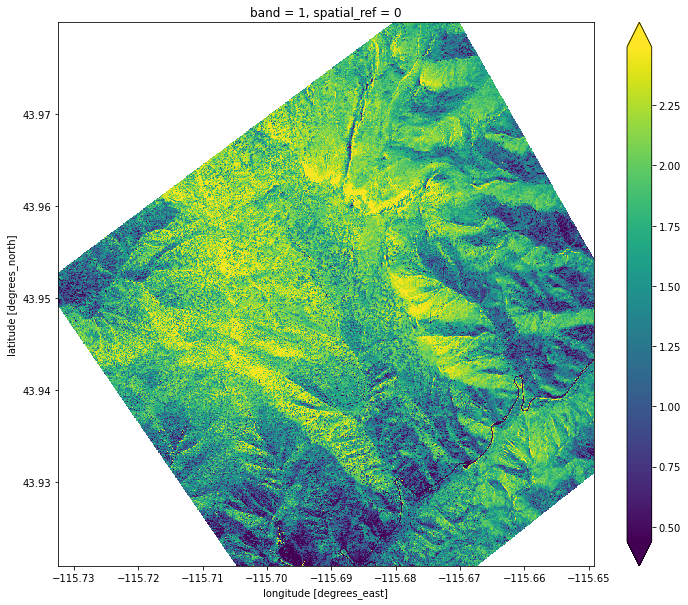

In [27]:
lidar_rp_match.plot(robust = True, figsize = (12,10))

In [29]:
rds = MCS_15_20_clip.squeeze().drop("spatial_ref").drop("band")
rds.name = "data"
df = rds.to_dataframe().reset_index()
df

,y,x,data
0,43.979899,-115.732464,NaN
1,43.979899,-115.732403,NaN
2,43.979899,-115.732342,NaN
3,43.979899,-115.732280,NaN
4,43.979899,-115.732219,NaN
...,...,...,...
1036149,43.920928,-115.649507,NaN
1036150,43.920928,-115.649445,NaN
1036151,43.920928,-115.649384,NaN
1036152,43.920928,-115.649323,NaN


In [44]:
lidar_rp_match_squeeze = lidar_rp_match.squeeze().drop("spatial_ref").drop("band")
lidar_rp_match_squeeze.name = "data"
df_lidar = lidar_rp_match_squeeze.to_dataframe().reset_index()
df_lidar

,y,x,data
0,43.979899,-115.732464,NaN
1,43.979899,-115.732403,NaN
2,43.979899,-115.732342,NaN
3,43.979899,-115.732280,NaN
4,43.979899,-115.732219,NaN
...,...,...,...
1036149,43.920928,-115.649507,NaN
1036150,43.920928,-115.649445,NaN
1036151,43.920928,-115.649384,NaN
1036152,43.920928,-115.649323,NaN


In [45]:
#merge df and df2
df_merged = pd.merge(df, df_lidar, on=['x', 'y'])
df_merged


,y,x,data_x,data_y
0,43.979899,-115.732464,NaN,NaN
1,43.979899,-115.732403,NaN,NaN
2,43.979899,-115.732342,NaN,NaN
3,43.979899,-115.732280,NaN,NaN
4,43.979899,-115.732219,NaN,NaN
...,...,...,...,...
713685,43.920928,-115.649568,NaN,NaN
713686,43.920928,-115.649507,NaN,NaN
713687,43.920928,-115.649384,NaN,NaN
713688,43.920928,-115.649323,NaN,NaN


<AxesSubplot:xlabel='data_x', ylabel='data_y'>

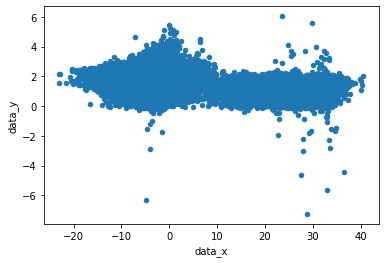

In [46]:
df_merged.plot.scatter(x='data_x', y='data_y')